# Assessment 2019

## Machine Learning and Statistics

### Student: G00364696




### Contents and Assignment Objectives
- [Introduction](#Introduction)


- [Describe](#Describe) Use descriptive statistics and plots to describe the Boston House Prices dataset


- [Infer](#Infer)
Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.


- [Predict](#Predict)
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

(Click on link in section title to go to section)

In [1]:
# import Libraries required for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import keras as kr
import sklearn.preprocessing as pre
import sklearn.model_selection


Using TensorFlow backend.


<a id="Intrpduction"></a>

In this section, we will use drscriptive statistics to describe the Boston 

### Origin of the dataset:
Each record in the dataset describes a boston suburb or town. The data in the Boston House Price dataser was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) from 1970 and collated in 1978. Each record in the dataset describes a boston suburb or town. There are 506 records in the dataset, with 14 variables representing information that may be related to that town.


These variables are:

- CRIM	
    Per capita crime rate by town
- ZN	
    Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS	
    Proportion of non-retail business acres per town
- CHAS	
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX	
    Nitric oxides concentration (parts per 10 million)
- RM	
    Average number of rooms per dwelling
- AGE	
    Proportion of owner-occupied units built prior to 1940
- DIS
    Weighted distances to five Boston employment centres
- RAD	
    Index of accessibility to radial highways
- TAX	
    Full-value property-tax rate per 10,000 USD
- PTRATIO	
    Pupil-teacher ratio by town
- B	1000
    (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT
    % lower status of the population
- MEDV	
    Median value of owner-occupied homes in $1000's

Note that the name of the district is not among the variables.

The "target" variable is MEDV, the median value of owner occupied homes (in $1,000s). A number of previous analyses seem to suggest that 16 data points under MEDV may conatin missing or censored values, and it may be worth considering if these should be removed. Note that for brevity, the term House price may be substituted for median houseprice throughout this report, particularly in section 3.

For this project, a copy of the dataset has been downloaded from the open machine learning website (www.openml.org), although other sources were available. For example, in an earlier version of this project, the data was accessed as a module imported from the sklearn package

A dataframe will be created from this csv file using the pandas read_csv method. Then summary statistics will be generated using the pandas describe function.


<a id="Describe"></a>

## Describe

### Getting Started: Creating a dataframe


In [4]:
# loading the boston house price dataset and converting to pandas dataframe

boston = pd.read_csv('boston.csv')
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# Generating summary statistics using the pandas describe method.
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Analysing the variance in median house prices by town/suburb

Our main interest is the house price (MEDV). Therefore, the first step we should do is to analyse this variable. The snippets of python code in the values in the MEDV field ascending order. To visualise the variance in house prices, a boxplot and then a histogram will be created.

In [6]:
# code to create a sorted list of house price values:
l = list(boston['MEDV'])
l.sort()
print(l)
print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.


[5.0, 5.0, 5.6, 6.3, 7.0, 7.0, 7.2, 7.2, 7.2, 7.4, 7.5, 8.1, 8.3, 8.3, 8.4, 8.4, 8.5, 8.5, 8.7, 8.8, 8.8, 9.5, 9.6, 9.7, 10.2, 10.2, 10.2, 10.4, 10.4, 10.5, 10.5, 10.8, 10.9, 10.9, 11.0, 11.3, 11.5, 11.7, 11.7, 11.8, 11.8, 11.9, 11.9, 12.0, 12.1, 12.3, 12.5, 12.6, 12.7, 12.7, 12.7, 12.8, 13.0, 13.1, 13.1, 13.1, 13.1, 13.2, 13.3, 13.3, 13.3, 13.4, 13.4, 13.4, 13.4, 13.5, 13.5, 13.6, 13.6, 13.8, 13.8, 13.8, 13.8, 13.8, 13.9, 13.9, 14.0, 14.1, 14.1, 14.1, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.5, 14.6, 14.6, 14.8, 14.9, 14.9, 14.9, 15.0, 15.0, 15.0, 15.1, 15.2, 15.2, 15.2, 15.3, 15.4, 15.4, 15.6, 15.6, 15.6, 15.6, 15.6, 15.7, 16.0, 16.1, 16.1, 16.1, 16.2, 16.2, 16.3, 16.4, 16.5, 16.5, 16.6, 16.6, 16.7, 16.7, 16.8, 16.8, 17.0, 17.1, 17.1, 17.1, 17.2, 17.2, 17.2, 17.3, 17.4, 17.4, 17.4, 17.5, 17.5, 17.5, 17.6, 17.7, 17.8, 17.8, 17.8, 17.8, 17.8, 17.9, 18.0, 18.1, 18.2, 18.2, 18.2, 18.3, 18.3, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.8, 18.9, 18.

### Now, we will visualise the variance in the data by way of a boxplot and a histogram.

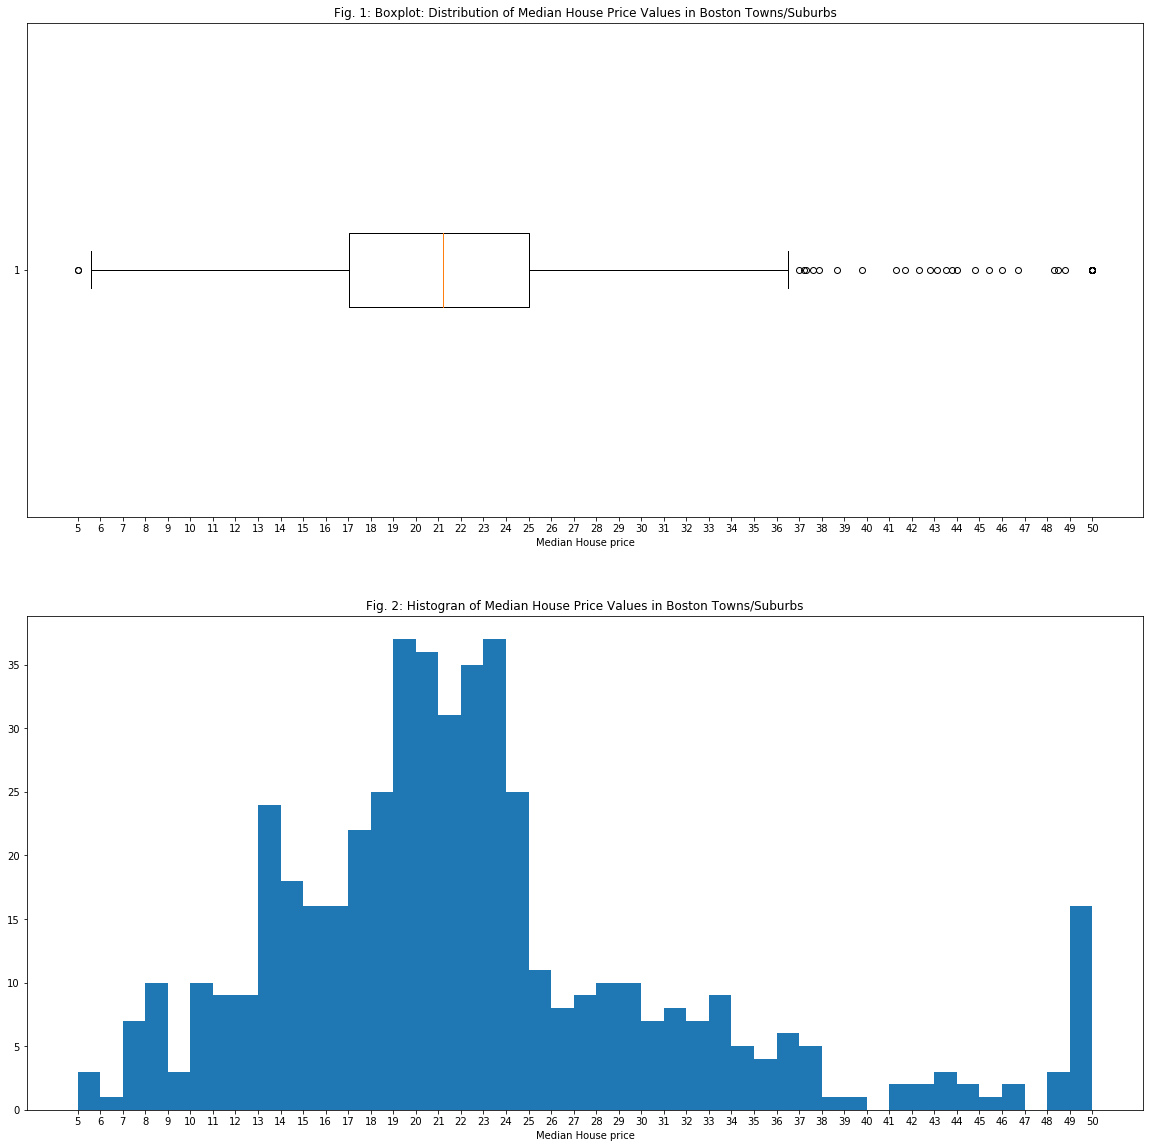

In [7]:
# create a numpy array from the MEDV (median value) column in the boston dataset

plt.rcParams['figure.figsize'] = [20,20]

price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()


### Initial observations. 

As can be seen from the above plots (and the descriptive statistics generated above), the mean price is roughly \\$23K. The boxplot shows a dataset that is centred around this mean with most of values lying between \\$ 17 and about  \\$ 25  (the 25% and 75% percentile points). The histogram shows a dataset which could almost conform to a normal distribution, were it not for the outliers above the \\$ 25K point.

The most common value in the data set is 50, a value that occurs in 16 rows. A number of analysts who have worked on this datset have suggested that that these data points represent missing or censored data values. They do appear as outliers and this approach may have merit. The following code snippets remove the 16 rows with MEDV = 50.

Then code below will re-do the boxplot and histogram.

It will be this revised dataset that will be used in the remainder of this notebook

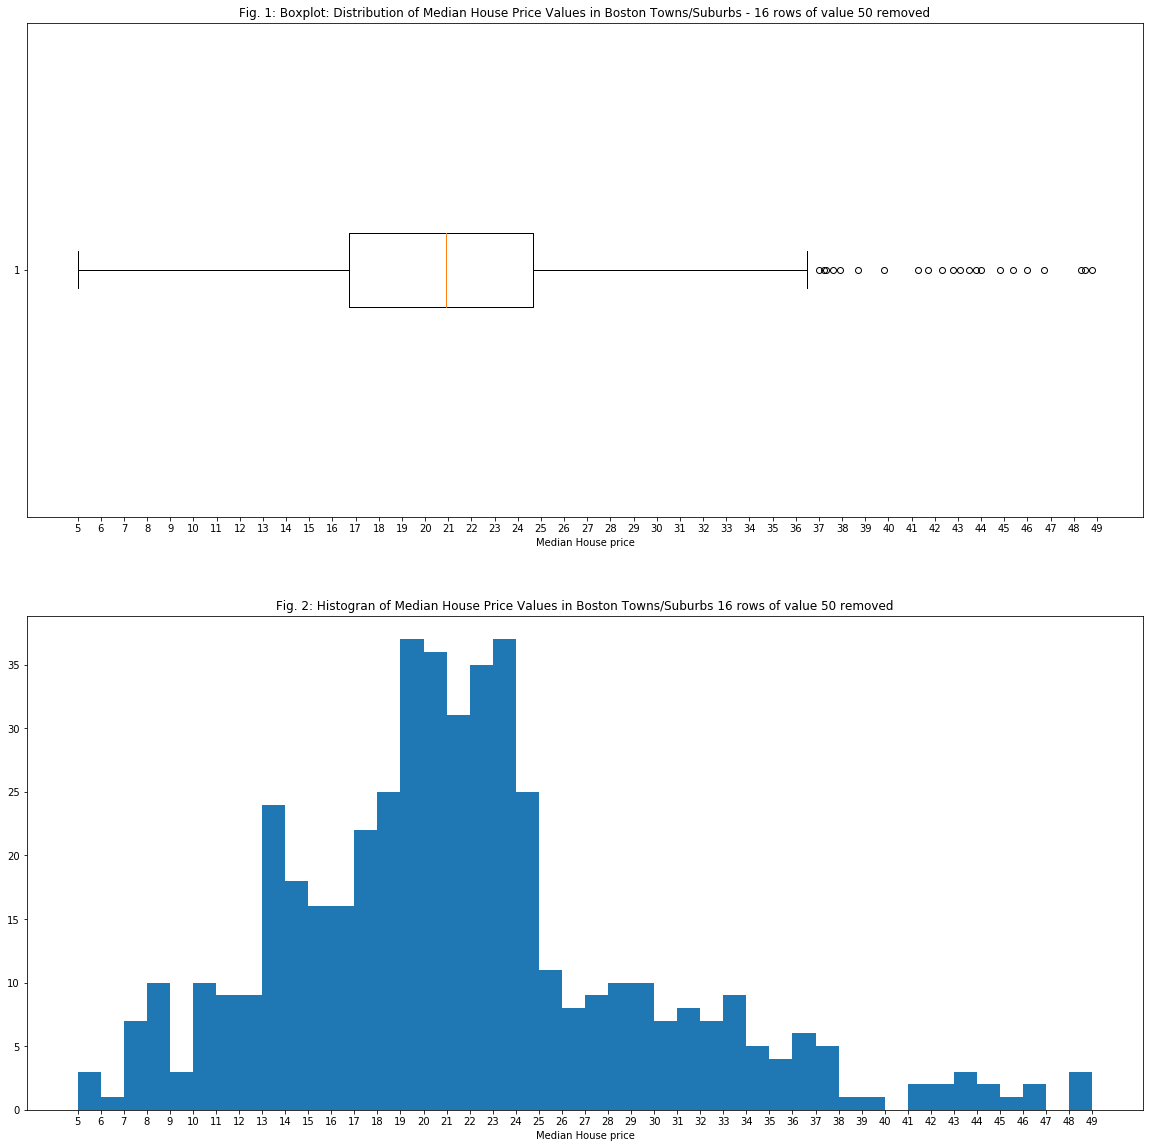

In [10]:
# code to remove the 16 rows where MEDV == 50

# l = list(boston[boston['MEDV']!=50])
# l.sort()
# print(l)
# print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.

plt.rcParams['figure.figsize'] = [20,20]

boston = boston[boston['MEDV'] != 50.0]
price = boston['MEDV']

price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs - 16 rows of value 50 removed")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs 16 rows of value 50 removed")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()


### Revised table of descriptive statistics.

In [11]:
boston.describe()


# The table below is the description of the statistics relfecting the removal of the 16 rows with MDEV = 50 removed.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


### Next steps: Exploring relationships

The next section will explore the relationships between the variables in the datste and the median house price. Rather than plotting every combination of values. we will first do a correltation matrix. This will show the correlation between values, where 1 denotes positive correlation and -1 denotes negative correlation.

As a first 

correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

what might we learn from this?

In this next subsections, we will create scatterplots with lines of best fit to see if we can identify relationships between selected 'feature' variables and the Median House Price for each town.


We will begin by looking at demographics. We have two demographic variables, namely Lower Status and B, related to the number of african americans in an area. We also have two related variables, the extent of criminality and the pupil-teacher ratio (which may be inversely related to educational attainment).


In [19]:
boston_corr = boston.corr().round(1)
# sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.5
ZN,-0.2,1.0,-0.5,-0.1,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.0,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.6
CHAS,-0.1,-0.1,0.0,1.0,0.1,0.0,0.1,-0.1,-0.0,-0.1,-0.1,0.0,-0.0,0.1
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.5
RM,-0.2,0.3,-0.4,0.0,-0.3,1.0,-0.3,0.2,-0.2,-0.3,-0.3,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.3,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.5
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.4
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.5,0.5,-0.5
TAX,0.6,-0.3,0.7,-0.1,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.6,-0.6


We can see from the above that the strongest correlations can be observed between LSTAT (-0.8, as might be expected), RM (positive correlation at 0.7, again, as might be expected.) Other variables with high correlation rates with MEDV are INDUS, TAX (both negative, arguably counter-intuitively in the case of property tax).

### Selected scatterplots: plotting relationships between variables

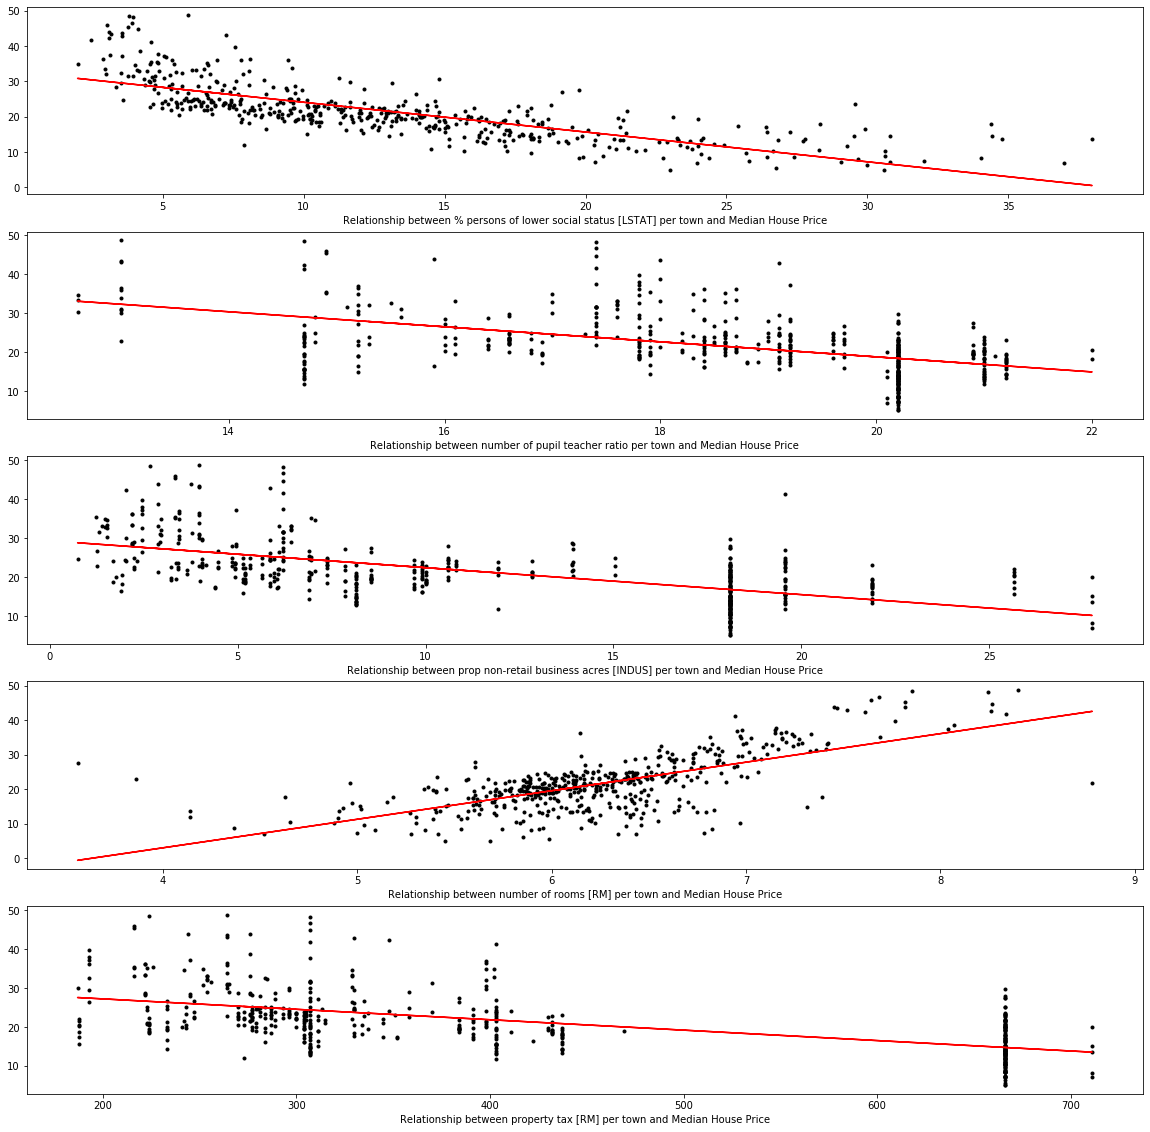

In [24]:
# Plots are only for variables that have a correlation of nearer -1 or +1 with MEDV.

plt.rcParams['figure.figsize'] = [20,20]


# use numply polyfit to get parameters of the equation of the line of best fit
# m = np.polyfit(x,y,1)[0]
# c = np.polyfit(x,y,1)[1]


# Plot relationship between social status and house price
plt.subplot(5,1,1)
x = boston['LSTAT']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between % persons of lower social status [LSTAT] per town and Median House Price")

# Plot relationship between the pupil-teacher ratio in an area and house eprice
plt.subplot(5,1,2)
x = boston['PTRATIO']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of pupil teacher ratio per town and Median House Price")

# Plot relationship between prop non-retail business acres and house price
plt.subplot(5,1,3)
x = boston['INDUS']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between prop non-retail business acres [INDUS] per town and Median House Price")

# Plot relationship between distance to five major employment centres and house price
plt.subplot(5,1,4)
x = boston['RM']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of rooms [RM] per town and Median House Price")

# Plot relationship between property employment centres and house price
plt.subplot(5,1,5)
x = boston['TAX']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between property tax [RM] per town and Median House Price")


plt.show()

<a id="Infer"></a>

# Infer

In this section we will perform a two sample t-test to see if there is a significant difference between the median house prices of houses along the Charles river and those that aren't.

Discuss aims of t-test. 

# State the Hypothesis.


Ine genreal, the null hypothesis states that there is no statistically significant difference between the two populations. Our null hypothesis states that there is no (significant) difference between the median house price of thoses houses brodering the Charles river and those that don't.

The Alternative Hypothesis therefore states that there is a significant difference.

We will look at the p-value. This is the probability of observing a sample statistic as extreme as the test statistic. If the p-value is > the significance level of 0.05, the null hypothesis will not be rejected.



Two samples. 

Samples are independent
Each population is 20 times larger than its respective sample

sample distribution is normal



What constitutes significant difference in this context?

Explanation of findings and what we can learn from T-Tests

(1) State the hypothesis

(2) Formulate an analysis plan (i.e. get samples)

(3) Analyze sample data

(4) Interpret results.



# Creating the sample sets

A T-test is based on samples of the populations, not the populations themselves (which of course would be impossible in the majority of real-life situations). In our data set, we do not have prices of all houses in boston; rather we have the median house price per town/suburb. Therefore it is reasonable to treat these are samples from the population of all houses in Boston at the time the datset was created.

The following code will therefore create two datasets, popCHAS and popNotCHAS. For the purpose of this exercise, these will represent samples of the house prices of those bordering the Charles River and those that do not respectively.

We can see from the descriptive statistics below that the respective means of the sample sets are 23.98 and 21.48. The question for this exercise, is does this constitute a statistically significant difference.

We can also see from the histograms that the  distribution of the samples conform roughly to a normal distribution.

In [27]:
# code to get samples - now, what is the minimum and/or maximum number of samples needed for a viable T-test? See notes
# and re-read wikipedia and e-books where covered.

# Take excerpt from datset, two columns, CHAS and MEDV

df = boston[['CHAS','MEDV']]
df
# break into two populations

popCHAS = df[df['CHAS'] == 1]
popNotCHAS = df[df['CHAS'] == 0]


In [29]:
popCHAS.describe()

,CHAS,MEDV
count,29.0,29.000000
mean,1.0,23.979310
std,0.0,7.024161
min,1.0,13.400000
25%,1.0,20.000000
50%,1.0,22.400000
75%,1.0,27.000000
max,1.0,46.000000


In [30]:
popNotCHAS.describe()

,CHAS,MEDV
count,461.0,461.000000
mean,0.0,21.488503
std,0.0,7.898848
min,0.0,5.000000
25%,0.0,16.500000
50%,0.0,20.600000
75%,0.0,24.500000
max,0.0,48.800000


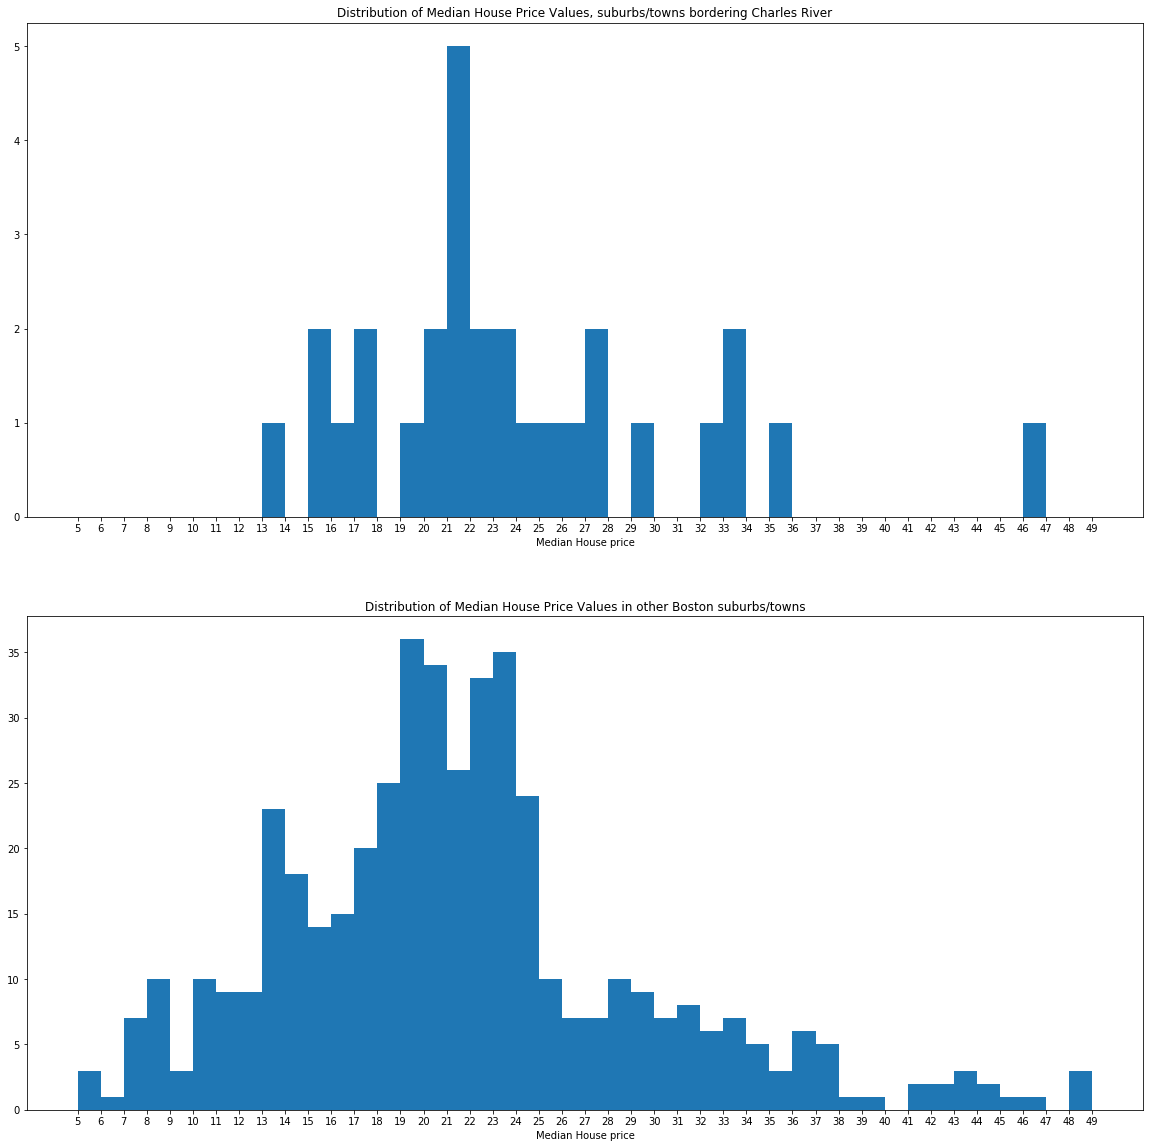

In [28]:
# Create histograms of subpopulation using pyplot
plt.subplot(2,1,1)
plt.hist(popCHAS['MEDV'], bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Distribution of Median House Price Values, suburbs/towns bordering Charles River")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(popNotCHAS['MEDV'], bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Distribution of Median House Price Values in other Boston suburbs/towns")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

In [26]:
# running the T-test
ttest = sp.stats.ttest_ind


result = ttest(popCHAS['MEDV'],popNotCHAS['MEDV'])

print(result)

Ttest_indResult(statistic=1.6571053443179937, pvalue=0.09814089320087695)


### Interpreting the results

Since the P-value of 0.98 is greater than the significance level of 0.05. Therefore, the null hypothesis, cannot be rejected. Therefor, we can conclude that there is no no significant difference between the house prices of those that are along the Chales River.

Section 1 found no correlation between house peice and prximity to the charles river, so the result of this T-test is consistent with this previous finding.


<a id="Predict"></a>
## Predict

The aim of this section is to create a nueral network using the python package Keras that can predict the median house price based on the other variables in the dataset.

The project spec states based on the other variables in the dataset. Therefore, for the first pass, we will not omit any variables.

The workings done following the lecture on the dogs dataset will be used as a template for this section.

Now, maybe there could be two "runs", one with all variables, one with selected variables ... what do we learn from this?

- What variables are we going to base the predication on? - all
- Do we need to create any new variables (e.g. to codify any categorical variables)? - no
- Decide on input variables
- Decide on output

Create the training set:
- What might be the reccommended ratio to use as a training/target set? Q - Is this necessary?

create the neural network
- instantiate a sequential model
    The core data
- add layers
- compile model



Train the neural network
- m.fit
- run and make note of loss
- do predictions - based on training set
- evaluate predictions - compare predicted house prices with actual values (all or a sample?)

Do we need to do anything to improve the performace of the network?

Do I need to watch final lecture series (Tuning nueral network in order to decide further course of action on this section)


In [20]:
# As per the dogs example in the lectures, we will use the full dataset as the training set.

# inputs13 = 13 "feature" variables.

# Now, neural netowrks do not "like" categorical variables. Fortuneately, therefore, all data in the boston dataset is numerical.
# The dummy variable 'CHAS' has already been coded into 1 and 0 for us (rather that TRUE/FALSE or YES/NO).


# So, the input set is defined as follows:
inputs13 = boston.drop(columns = 'MEDV') # i.e. "feature" variables only
# whereas the output is the prices themselve
outputs = boston['MEDV'] # i.e the house price column


In [21]:
inputs13.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [22]:
# Create the neural network

# This network is adapted from the first network we we used in the dogs dataset workings

# The Sequential model is a linear stack of layers.

# instantiate an instance of a sequential model
m = kr.models.Sequential()

# add layers
# dim = x, where x is the number of inputs

m.add(kr.layers.Dense(10, input_dim=13, activation = "linear")) # dim = 13 because there are 13 input variables. 
m.add(kr.layers.Dense(10, activation = "linear")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

# Training the neural network using fit:

m.fit(inputs13, outputs, epochs=10, batch_size=10)


Epoch 1/10
490/490 [==============================] - 1s 3ms/step - loss: 2493.0186
Epoch 2/10
490/490 [==============================] - 0s 314us/step - loss: 390.5572
Epoch 3/10
490/490 [==============================] - 0s 346us/step - loss: 185.2436
Epoch 4/10
490/490 [==============================] - 0s 291us/step - loss: 153.2248
Epoch 5/10
490/490 [==============================] - 0s 320us/step - loss: 140.7213
Epoch 6/10
490/490 [==============================] - 0s 328us/step - loss: 124.5152
Epoch 7/10
490/490 [==============================] - 0s 348us/step - loss: 114.8021
Epoch 8/10
490/490 [==============================] - 0s 292us/step - loss: 104.1472
Epoch 9/10
490/490 [==============================] - 0s 290us/step - loss: 101.2659
Epoch 10/10
490/490 [==============================] - 0s 321us/step - loss: 92.4828


In [23]:
#  Now we will do predictions
m.predict(inputs13)

array([[ 27.60774  ],
       [ 24.302254 ],
       [ 22.312788 ],
       [ 20.44854  ],
       [ 21.424902 ],
       [ 21.423542 ],
       [ 27.52327  ],
       [ 30.17883  ],
       [ 32.455093 ],
       [ 28.635077 ],
       [ 30.076508 ],
       [ 28.112852 ],
       [ 27.106037 ],
       [ 24.400545 ],
       [ 25.323217 ],
       [ 24.275112 ],
       [ 22.100246 ],
       [ 26.46354  ],
       [ 20.813974 ],
       [ 25.501354 ],
       [ 28.04986  ],
       [ 26.78039  ],
       [ 27.929752 ],
       [ 28.582447 ],
       [ 27.564016 ],
       [ 24.111355 ],
       [ 26.40741  ],
       [ 24.47584  ],
       [ 26.532013 ],
       [ 25.70684  ],
       [ 27.680325 ],
       [ 25.991158 ],
       [ 24.106749 ],
       [ 26.786755 ],
       [ 23.320154 ],
       [ 25.04087  ],
       [ 24.506994 ],
       [ 23.51991  ],
       [ 23.264275 ],
       [ 36.564342 ],
       [ 35.80369  ],
       [ 19.254755 ],
       [ 19.48247  ],
       [ 20.238575 ],
       [ 21.907541 ],
       [ 2

Evaluation: Comparing of predicted prices vs actual house price (MEDV)


In [24]:
# evaluation predictions: comparing of predicted vs actual (median) house price (Predicted prices are rounded for better comparison)

# looking at the difference between the predicted prices (output) and the actual prices

diff = np.around(m.predict(inputs13).T - outputs.as_matrix()) # transposing input set and matrix-ising output set so they can be subtracted

diff


/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[  4.,   3., -12., -13., -15.,  -7.,   5.,   3.,  16.,  10.,  15.,
          9.,   5.,   4.,   7.,   4.,  -1.,   9.,   1.,   7.,  14.,   7.,
         13.,  14.,  12.,  10.,  10.,  10.,   8.,   5.,  15.,  11.,  11.,
         14.,  10.,   6.,   5.,   3.,  -1.,   6.,   1.,  -7.,  -6.,  -4.,
          1.,   3.,   3.,   9.,  15.,   5.,   7.,   6.,  -1.,   2.,  25.,
          2.,  14.,   9.,   3.,   8.,  10.,  14.,   6.,   2.,  -9.,  15.,
         21.,   4.,  10.,   5.,  -3.,   1.,  -1.,  -2.,  -0.,   4.,   7.,
          5.,   5.,   5.,  -1.,   5.,   3.,   5.,  -1.,  -4.,   1.,   1.,
          1.,  -5.,   2.,   3.,   7.,   4.,  11.,  -6.,   4., -14., -21.,
         -9.,   0.,   1.,  -1.,  10.,   9.,  11.,  11.,   9.,  10.,  10.,
          6.,   6.,  12.,  12.,  10.,  10.,   7.,   9.,   7.,   9.,   4.,
          6.,   7.,  12.,   9.,   5.,  13.,  16.,  14.,  18.,  12.,  11.,
          7.,  13.,  12.,  14.,  14.,  15.,  20.,  15.,  20.,  21.,  17.,
         14.,  20.,  11.,   6.,  17., 

In [25]:
# Calculation of mean squared error

np.sqrt(np.sum((m.predict(inputs13).T - outputs.as_matrix())**2))

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


226.86100339690836

In [26]:
# Percentage of values in the set of predicted value - actual value that are zero, i.e that are correct predictions
def percentageCorrect(diff):
    a = diff.tolist() # convert ndarray back to list
    x = a[0] #select the dat from teh list

    res = sum (1 for i in x if (i == 0 or i == -0)) # count values that are = 0
    return res/diff.size # return res as % of total number of values in th array
                
               
print("{:.2%}".format(percentageCorrect(diff)))

3.88%


**Observations on first run**

(1) Ideally, the mean squared error should be approaching zero.
(2) Likewise the loss should be much lower, close to zero.

and of course ..

(3) The (rounded) difference between the predited prices and actual prices should be 0 in all or most cases. In fact, only 4.69% of predictions exactly match actual values.

What can we do to improve the accuaracy of the network?

The github history of this section will suggest that simply increasing the number of nuerons and/or epochs has little impact of the predictive power of the model.

A different approach is called for. The project specification does allow for us to run a network with a subset of variables. We will therefore revist the variables that are most likely determinants of MEDV.


Selecting a subset of variables:

revisiting section 1:

There appears to be a positive relationship between the number of rooms (RM) and house price and a negative relationship with social status (LSTAT) and to a lesser extents with pupil-teacher ratio (PTRATIO). This has also been observed by Mr. Victor Roman (https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d).

As an experiment, we will rerun the neural network with this rationalised set of inputs.


In [27]:
#  new input set:
inputs3 = boston[['RM','LSTAT','PTRATIO']]
inputs3


,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


In [28]:
# Rebuild the neural Network:
# This was the first network we used in the dogs workings

# The Sequential model is a linear stack of layers.

# instantiate an instance of a sequential model
m = kr.models.Sequential()

# add layers
# dim = x, where x is the number of inputs

m.add(kr.layers.Dense(10, input_dim=3, activation = "linear")) # dim = 3 because there are now only 3 input variables. 
# leave rest of the network as is:
m.add(kr.layers.Dense(10, activation = "linear")) # 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

# Training the neural network using fit:

m.fit(inputs3, outputs, epochs=10, batch_size=10)


Epoch 1/10
490/490 [==============================] - 1s 3ms/step - loss: 280.9858
Epoch 2/10
490/490 [==============================] - 0s 295us/step - loss: 125.5759
Epoch 3/10
490/490 [==============================] - 0s 321us/step - loss: 82.7514
Epoch 4/10
490/490 [==============================] - 0s 340us/step - loss: 57.7209
Epoch 5/10
490/490 [==============================] - 0s 307us/step - loss: 47.8319
Epoch 6/10
490/490 [==============================] - 0s 311us/step - loss: 44.8939
Epoch 7/10
490/490 [==============================] - 0s 315us/step - loss: 43.7947
Epoch 8/10
490/490 [==============================] - 0s 308us/step - loss: 43.2050
Epoch 9/10
490/490 [==============================] - 0s 315us/step - loss: 42.5929
Epoch 10/10
490/490 [==============================] - 0s 324us/step - loss: 41.8571


In [29]:
# Calculation of mean squared error

np.sqrt(np.sum((m.predict(inputs3).T - outputs.as_matrix())**2))

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


141.59732016730462

In [30]:
diff2 = (np.around(m.predict(inputs3).T - outputs.as_matrix()))
diff2

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  0.,   2.,  -6.,  -3.,  -7.,  -1.,  -6., -15., -14.,  -6.,  -4.,
         -2.,  -7.,   8.,   8.,   8.,   6.,   5.,   4.,   7.,   3.,   4.,
          4.,   4.,   6.,   7.,   6.,   6.,   6.,   5.,   3.,  10.,  -1.,
          6.,   5.,   6.,   3.,   4.,  -1.,  -2.,  -4.,   1.,   1.,   0.,
          2.,   3.,  -1.,  -1., -10.,  -2.,  -1.,   1.,   1.,  -1.,   4.,
         -7.,   1.,  -7.,   4.,   6.,   3.,   5.,   6.,   1.,  -7.,   2.,
          0.,   3.,   3.,   4.,   3.,   3.,   5.,   3.,   3.,   3.,   2.,
          3.,   1.,   4.,   1.,   3.,   2.,   3.,   0.,   0.,  -1.,   3.,
          4.,  -1.,   1.,   2.,   2.,   1.,   2.,  -2.,   0.,  -9., -14.,
         -6.,   0.,   3.,   8.,   5.,   5.,   1.,  -0.,   3.,   5.,   3.,
          3.,   0.,  -2.,  -2.,   4.,  -1.,  -0.,   3.,  -2.,  -0.,  -2.,
          0.,  -3.,  -6.,  -1.,  -1.,  -6.,   4.,   5.,   5.,   6.,   6.,
          3.,   4.,   5.,   3.,   4.,   6.,   4.,   2.,   1.,  -9., -10.,
        -11., -11., -10.,  -3., -14., 

In [31]:
# Printing percentage of correct values predicted

print("{:.2%}".format(percentageCorrect(diff2)))

5.92%


Evaluation:

Limiting the input set to three key variables has imporved the predictive power of the model as demonstrated by:

- Smaller loss
- Smaller Mean Squared Error
- Predicted prices that are closer (on average) to the actual price - But we would like to see more 0s! The prediction rate has only gone up to 7.55% (in terms of exact predictions)

It may be that expecting exact predictions in all cases might be a bit optimistic, and this may be revisited as a method of evaluation.

In [32]:
# so Now we are back to the trial and error process of tweaking the model to improve its predictive power.

m = kr.models.Sequential()

# add layers
m.add(kr.layers.Dense(10, input_dim=3, activation = "linear")) # change activation function to sigmoid
m.add(kr.layers.Dense(30, activation = "sigmoid"))
m.add(kr.layers.Dense(10, activation = "linear")) # add another layer
m.add(kr.layers.Dense(10, activation = "linear")) 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

m.fit(inputs3, outputs, epochs=35, batch_size=10)


Epoch 1/35
490/490 [==============================] - 2s 4ms/step - loss: 415.0089
Epoch 2/35
490/490 [==============================] - 0s 394us/step - loss: 153.0744
Epoch 3/35
490/490 [==============================] - 0s 432us/step - loss: 40.8932
Epoch 4/35
490/490 [==============================] - 0s 404us/step - loss: 32.7994
Epoch 5/35
490/490 [==============================] - 0s 379us/step - loss: 29.9389
Epoch 6/35
490/490 [==============================] - 0s 363us/step - loss: 28.2803
Epoch 7/35
490/490 [==============================] - 0s 383us/step - loss: 26.5466
Epoch 8/35
490/490 [==============================] - 0s 367us/step - loss: 25.2826
Epoch 9/35
490/490 [==============================] - 0s 379us/step - loss: 22.9257
Epoch 10/35
490/490 [==============================] - 0s 353us/step - loss: 20.9892
Epoch 11/35
490/490 [==============================] - 0s 364us/step - loss: 19.2858
Epoch 12/35
490/490 [==============================] - 0s 321us/step - los

In [33]:
# Analysing variance between predicted price and actual price

diff3 = (np.around(m.predict(inputs3).T - outputs.as_matrix()))
diff3


/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[  9.,   2.,  -1.,  -0.,  -7.,  -2.,  -1., -11.,  -2.,  -2.,   1.,
          2.,  -4.,   0.,   2.,   1.,  -1.,   0.,  -1.,   1.,  -1.,  -1.,
          0.,  -0.,   1.,   2.,   1.,   2.,   1.,  -1.,  -0.,   4.,  -2.,
          2.,   1.,   2.,  -0.,   0.,  -4.,  -2.,   1.,   3.,   0.,  -1.,
          1.,   1.,  -2.,  -2.,  -2.,  -3.,  -0.,   3.,   4.,   0.,  -1.,
         -3.,   3.,   5.,  -0.,   1.,  -0.,   2.,   2.,  -3.,  -7.,   7.,
          3.,  -0.,   1.,   1.,  -0.,  -1.,   2.,  -0.,  -0.,   1.,   1.,
          0.,  -1.,   1.,  -1.,   1.,  -1.,   0.,  -2.,  -1.,  -3.,   0.,
          6.,   1.,   1.,   2.,   1.,   0.,   1.,  -2.,  -0.,  -1.,  -6.,
         -3.,  -6.,  -4.,   2.,  -0.,  -1.,  -3.,  -4.,  -2.,   0.,  -2.,
         -3.,   1.,  -2.,  -2.,   3.,  -1.,  -0.,   2.,  -3.,  -1.,  -4.,
         -2.,  -5.,  -5.,  -3.,  -3.,  -4.,  -0.,   0.,   1.,   0.,  -0.,
         -3.,  -1.,   0.,  -1.,  -1.,   1.,  -0.,  -2.,  -2.,  -3.,   1.,
         -1.,   2.,   2.,   1.,  -0., 

In [34]:
print("{:.2%}".format(percentageCorrect(diff3)))

13.06%


In [35]:
# np.sqrt(np.sum((m.predict(inputs3).T - outputs.as_matrix())**2))
# calculate the mean squared error
np.sqrt(np.sum((diff3)**2))


79.95623803056269

Comment:
    
We would still like to see a lot more zeros, but an eyeballing of the diff3 array (the differences between the predicted and actual prices) suggests that in more and more cases, the difference iof a lower order than in the previous predictions.

In [36]:
#  Reduced input set, take 3

m = kr.models.Sequential()

# add layers
m.add(kr.layers.Dense(20, input_dim=3, activation = "linear")) # change activation function to sigmoid
m.add(kr.layers.Dense(10, activation = "linear"))
# m.add(kr.layers.Dense(10, activation = "linear")) # add another layer
# m.add(kr.layers.Dense(10, activation = "linear")) 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")

m.fit(inputs3, outputs, epochs=175, batch_size=10)

Epoch 1/175
490/490 [==============================] - 1s 3ms/step - loss: 130.7863
Epoch 2/175
490/490 [==============================] - 0s 350us/step - loss: 69.1546
Epoch 3/175
490/490 [==============================] - 0s 329us/step - loss: 49.1606
Epoch 4/175
490/490 [==============================] - 0s 353us/step - loss: 44.4809
Epoch 5/175
490/490 [==============================] - 0s 348us/step - loss: 42.3213
Epoch 6/175
490/490 [==============================] - 0s 320us/step - loss: 40.3566
Epoch 7/175
490/490 [==============================] - 0s 304us/step - loss: 38.9747
Epoch 8/175
490/490 [==============================] - 0s 378us/step - loss: 36.4808
Epoch 9/175
490/490 [==============================] - 0s 426us/step - loss: 35.2058
Epoch 10/175
490/490 [==============================] - 0s 357us/step - loss: 32.8482
Epoch 11/175
490/490 [==============================] - 0s 323us/step - loss: 31.2237
Epoch 12/175
490/490 [==============================] - 0s 317us

In [37]:
np.around(m.predict(inputs3))

array([[29.],
       [24.],
       [31.],
       [30.],
       [30.],
       [26.],
       [23.],
       [20.],
       [12.],
       [20.],
       [20.],
       [22.],
       [20.],
       [20.],
       [20.],
       [19.],
       [21.],
       [17.],
       [16.],
       [18.],
       [12.],
       [17.],
       [16.],
       [14.],
       [16.],
       [14.],
       [16.],
       [16.],
       [21.],
       [22.],
       [12.],
       [18.],
       [10.],
       [14.],
       [15.],
       [21.],
       [19.],
       [21.],
       [21.],
       [27.],
       [31.],
       [28.],
       [25.],
       [24.],
       [22.],
       [20.],
       [19.],
       [18.],
       [ 8.],
       [17.],
       [21.],
       [23.],
       [28.],
       [23.],
       [17.],
       [31.],
       [26.],
       [31.],
       [23.],
       [20.],
       [18.],
       [18.],
       [24.],
       [25.],
       [28.],
       [27.],
       [22.],
       [21.],
       [17.],
       [21.],
       [25.],
      

In [38]:
# evaluation predictions: comparing of predicted vs actual (median) house price

# looking at the difference between the predicted lifespan (output) and the actual lifespan

diff4 = np.around(m.predict(inputs3).T - outputs.as_matrix()) # transposing input set and matrix-ising output set so they can be subtracted
diff4

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[  5.,   3.,  -4.,  -3.,  -7.,  -3.,  -0.,  -7.,  -5.,   1.,   5.,
          3.,  -1.,  -0.,   2.,  -0.,  -2.,  -0.,  -4.,  -1.,  -2.,  -2.,
          1.,  -1.,   0.,   0.,  -0.,   1.,   2.,   1.,  -1.,   4.,  -3.,
          1.,   1.,   2.,  -1.,  -0.,  -4.,  -3.,  -4.,   2.,  -1.,  -1.,
          1.,   1.,  -1.,   1.,  -6.,  -3.,   1.,   3.,   3.,  -0.,  -2.,
         -5.,   2.,  -1.,  -0.,   1.,  -1.,   2.,   2.,  -0.,  -5.,   4.,
          2.,  -1.,  -0.,   0.,   0.,  -1.,   1.,  -0.,   0.,   2.,   2.,
          1.,   0.,   1.,  -1.,   2.,  -1.,   0.,  -0.,  -0.,  -3.,   1.,
          6.,   1.,   2.,   3.,   2.,  -0.,   2.,  -2.,   0.,  -3.,  -9.,
         -2.,  -4.,  -2.,   3.,  -1.,  -1.,  -4.,  -5.,  -2.,   1.,  -1.,
         -3.,   3.,  -1.,   0.,   4.,   0.,   1.,   3.,  -2.,  -1.,  -4.,
         -2.,  -4.,  -5.,  -2.,  -3.,  -5.,  -2.,   1.,  -1.,   1.,   0.,
         -2.,  -2.,  -1.,  -0.,  -2.,   2.,  -0.,  -2.,  -1., -12.,  -1.,
         -3.,  -3.,   2.,   3.,  -6., 

In [39]:
np.sqrt(np.sum((diff4)**2))

96.08329719571451

In [40]:
print("{:.2%}".format(percentageCorrect(diff4)))

13.67%


Observation after 4th run:

Increasing number of epochs only has marginal impact on predictive power of neural network. So clearly there is a law of diminishing returns to simply increasing the number of epochs.

In [41]:
#  Reduced input set, take 3

m = kr.models.Sequential()

# add layers
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation = "relu")) # change activation function to sigmoid
m.add(kr.layers.Dense(20, activation = "linear"))
m.add(kr.layers.Dense(5, activation = "linear")) # add another layer
m.add(kr.layers.Dense(10, activation = "linear")) 
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = 'adam')

m.fit(inputs3, outputs, epochs=70, batch_size=10)


Epoch 1/70
490/490 [==============================] - 2s 5ms/step - loss: 413.5956
Epoch 2/70
490/490 [==============================] - 1s 1ms/step - loss: 116.3264
Epoch 3/70
490/490 [==============================] - 0s 648us/step - loss: 80.5840
Epoch 4/70
490/490 [==============================] - 1s 1ms/step - loss: 50.7855
Epoch 5/70
490/490 [==============================] - 1s 1ms/step - loss: 38.2843
Epoch 6/70
490/490 [==============================] - 1s 1ms/step - loss: 36.6675
Epoch 7/70
490/490 [==============================] - 0s 825us/step - loss: 34.7778
Epoch 8/70
490/490 [==============================] - 1s 1ms/step - loss: 31.9250
Epoch 9/70
490/490 [==============================] - 0s 767us/step - loss: 29.8436
Epoch 10/70
490/490 [==============================] - 0s 842us/step - loss: 28.5719
Epoch 11/70
490/490 [==============================] - 0s 859us/step - loss: 27.3070
Epoch 12/70
490/490 [==============================] - 1s 1ms/step - loss: 26.1004
E

In [42]:
diff5 = np.around(m.predict(inputs3).T - outputs.as_matrix())
diff5

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  8.,   1.,   0.,   1.,  -5.,  -2.,  -2.,  -8.,  -4.,   0.,   4.,
          2.,  -2.,  -0.,   2.,  -0.,  -2.,   0.,  -3.,   0.,   0.,  -2.,
          1.,   0.,   1.,   2.,   0.,   2.,   2.,   0.,   1.,   4.,  -1.,
          2.,   2.,   1.,  -1.,  -1.,  -4.,  -1.,   2.,   4.,  -0.,  -2.,
          0.,   0.,  -1.,   1.,  -4.,  -2.,   0.,   2.,   4.,  -1.,  -2.,
         -2.,   3.,   4.,  -1.,   1.,  -1.,   2.,   2.,  -2.,  -6.,   6.,
          1.,  -1.,   0.,  -0.,  -0.,  -1.,   1.,  -1.,  -1.,   1.,   1.,
          0.,  -1.,   0.,   1.,   1.,  -1.,  -1.,  -2.,  -0.,  -3.,  -0.,
          8.,   3.,   0.,   1.,   0.,  -0.,   1.,  -2.,  -0.,   1.,  -4.,
         -1.,  -5.,  -3.,   2.,  -0.,  -1.,  -3.,  -4.,  -2.,   1.,  -1.,
         -2.,   1.,  -1.,  -0.,   3.,   0.,  -0.,   2.,  -2.,  -1.,  -4.,
         -2.,  -3.,  -4.,  -2.,  -3.,  -4.,  -1.,   1.,   1.,   1.,   0.,
         -2.,  -1.,   0.,  -0.,  -1.,   2.,   1.,  -1.,   0.,  -8.,  -0.,
         -2.,  -1.,   2.,   3.,  -4., 

In [43]:
np.sqrt(np.sum((diff5)**2))

84.95292814258964

In [44]:
print("{:.2%}".format(percentageCorrect(diff5)))

15.10%


### Preprocessing: Fitting and Transforming

In [52]:
# Normalizing values in Inputs 3 
Input_scaled = pd.DataFrame(pre.scale(inputs3), columns = inputs3.columns) # scaling inputs3

Input_scaled 

,RM,LSTAT,PTRATIO
0,0.505040,-1.122679,-1.527280
1,0.269017,-0.534772,-0.341504
2,1.439934,-1.256937,-0.341504
3,1.153335,-1.410980,0.085376
4,1.381694,-1.073216,0.085376
...,...,...,...
485,0.532627,-0.459871,1.176290
486,-0.192299,-0.543252,1.176290
487,1.119618,-1.029406,1.176290
488,0.840682,-0.910694,1.176290


In [53]:
Input_scaled.describe()

,RM,LSTAT,PTRATIO
count,4.900000e+02,4.900000e+02,4.900000e+02
mean,2.246502e-16,3.375984e-17,2.646409e-16
std,1.001022e+00,1.001022e+00,1.001022e+00
min,-4.114256e+00,-1.546651e+00,-2.807918e+00
25%,-5.585936e-01,-7.880951e-01,-5.312277e-01
50%,-9.267930e-02,-1.765163e-01,2.751001e-01
75%,5.096376e-01,5.926385e-01,7.968416e-01
max,3.884451e+00,3.539593e+00,1.650600e+00


In [56]:
round(Input_scaled.mean()) # to show that the mean is near zero

RM         0.0
LSTAT      0.0
PTRATIO    0.0
dtype: float64

In [58]:
Input_scaled.std()

RM         1.001022
LSTAT      1.001022
PTRATIO    1.001022
dtype: float64

In [71]:
scaler = pre.StandardScaler()

scaler.fit(inputs3)



In [73]:
scaler.fit(inputs3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaler.transform(inputs3)

array([[ 0.50503976, -1.12267925, -1.52727975],
       [ 0.26901737, -0.53477219, -0.34150355],
       [ 1.43993368, -1.25693687, -0.34150355],
       ...,
       [ 1.11961757, -1.02940553,  1.17628999],
       [ 0.84068201, -0.91069353,  1.17628999],
       [-0.33023431, -0.71284019,  1.17628999]])

In [76]:
Inputs_scaled = pd.DataFrame(scaler.transform(inputs3), columns = inputs3.columns)

In [77]:
Inputs_scaled

,RM,LSTAT,PTRATIO
0,0.505040,-1.122679,-1.527280
1,0.269017,-0.534772,-0.341504
2,1.439934,-1.256937,-0.341504
3,1.153335,-1.410980,0.085376
4,1.381694,-1.073216,0.085376
...,...,...,...
485,0.532627,-0.459871,1.176290
486,-0.192299,-0.543252,1.176290
487,1.119618,-1.029406,1.176290
488,0.840682,-0.910694,1.176290


In [81]:
Inputs_scaled

,RM,LSTAT,PTRATIO
0,0.505040,-1.122679,-1.527280
1,0.269017,-0.534772,-0.341504
2,1.439934,-1.256937,-0.341504
3,1.153335,-1.410980,0.085376
4,1.381694,-1.073216,0.085376
...,...,...,...
485,0.532627,-0.459871,1.176290
486,-0.192299,-0.543252,1.176290
487,1.119618,-1.029406,1.176290
488,0.840682,-0.910694,1.176290


### Whitening Data

In [87]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 3, whiten = True)
pca.fit(inputs3)
Inputs3_whiten = pd.DataFrame(pca.transform(inputs3), columns = inputs3.columns)




In [ ]:
import s

In [82]:
inputs3.corr()

,RM,LSTAT,PTRATIO
RM,1.000000,-0.610369,-0.293299
LSTAT,-0.610369,1.000000,0.358023
PTRATIO,-0.293299,0.358023,1.000000


In [89]:
Inputs3_whiten.corr()

,RM,LSTAT,PTRATIO
RM,1.000000e+00,-4.445433e-16,-1.611980e-16
LSTAT,-4.445433e-16,1.000000e+00,-1.960713e-15
PTRATIO,-1.611980e-16,-1.960713e-15,1.000000e+00


In [93]:
m = kr.models.Sequential()

# add layers
m.add(kr.layers.Dense(10, input_dim=3, activation = "relu")) #
# m.add(kr.layers.Dense(30, activation = "sigmoid"))
m.add(kr.layers.Dense(10, activation = "linear"))
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "sgd", metrics = ['accuracy'])

m.fit(Inputs3_whiten, outputs, epochs=35, batch_size=10)

Epoch 1/35
490/490 [==============================] - 1s 2ms/step - loss: 94.4418 - accuracy: 0.0061
Epoch 2/35
490/490 [==============================] - 0s 655us/step - loss: 34.0278 - accuracy: 0.0122
Epoch 3/35
490/490 [==============================] - 0s 693us/step - loss: 19.1690 - accuracy: 0.0143
Epoch 4/35
490/490 [==============================] - 0s 724us/step - loss: 26.1639 - accuracy: 0.0102
Epoch 5/35
490/490 [==============================] - 0s 585us/step - loss: 15.5456 - accuracy: 0.0163
Epoch 6/35
490/490 [==============================] - 0s 591us/step - loss: 19.0643 - accuracy: 0.0102
Epoch 7/35
490/490 [==============================] - 0s 677us/step - loss: 13.7896 - accuracy: 0.0122
Epoch 8/35
490/490 [==============================] - 0s 705us/step - loss: 25.0161 - accuracy: 0.0122
Epoch 9/35
490/490 [==============================] - 0s 569us/step - loss: 13.8245 - accuracy: 0.0143
Epoch 10/35
490/490 [==============================] - 0s 568us/step - loss